<a href="https://colab.research.google.com/github/ldm2060/LearningNote/blob/main/DL%202023.6/week4/%E8%A7%86%E9%A2%91%E7%AC%94%E8%AE%B0/note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK4

## 4.1 自注意力机制

vector set as input

Self-attention：考虑一整个set的内容作为输入  
  - 输出：一个set


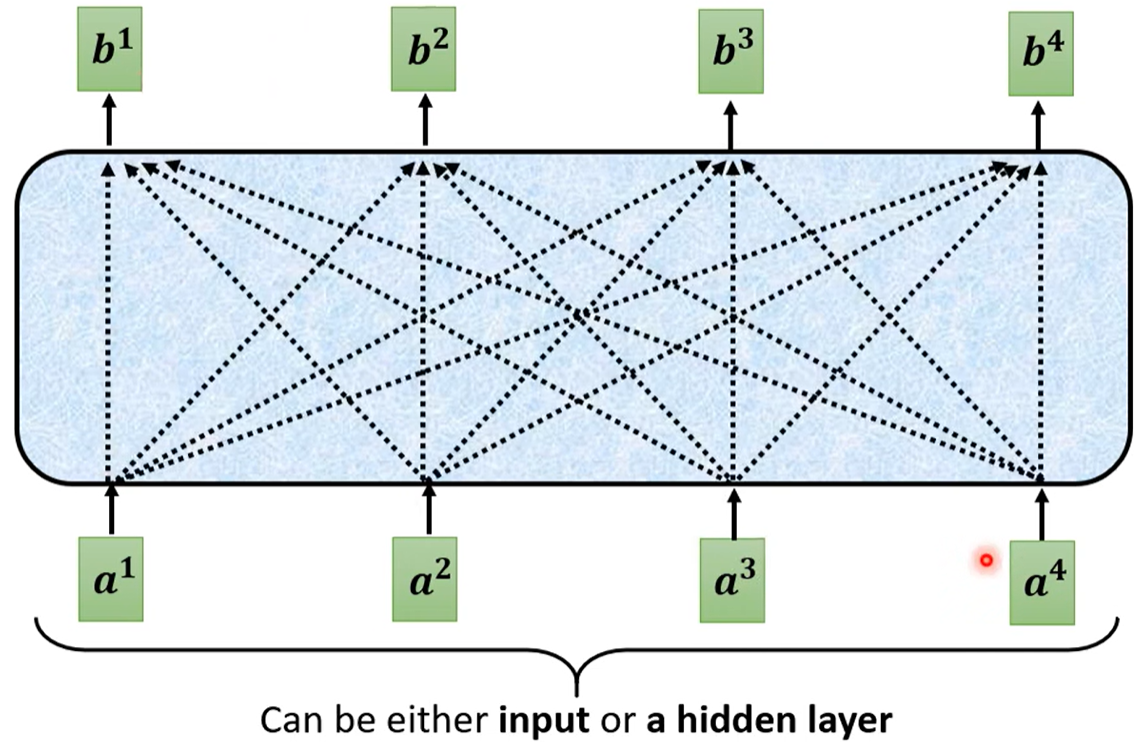

ouput $b^i$：find the relevant(with $a^i$) vectors in sequence

如何知道相关度：一个attention模块（如dot product），输入为两个向量，输出为相关度

计算相关度模块例子：


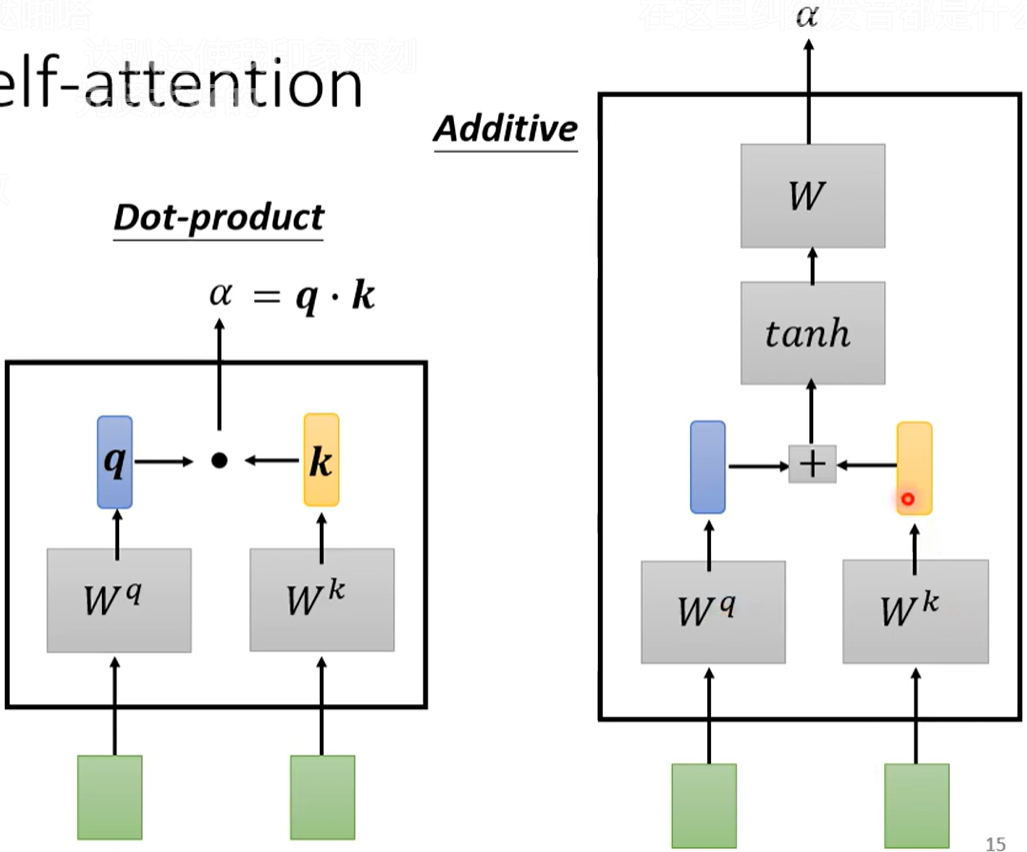


$b^1 = \sum_i a'_{1,i} v^i$



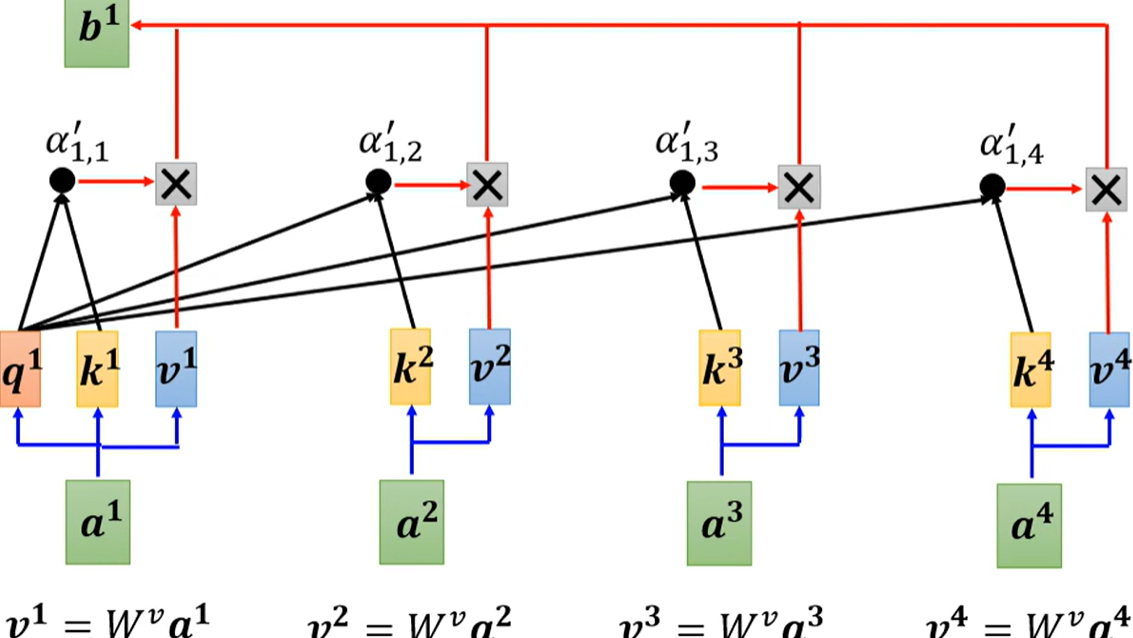

$q^i=W^qa^i,k^i=W^ka^i,v^i=W^va^i$

$\alpha'_{i,j} = {k^j}^Tq^i$ 为 inner product

即：$\begin{bmatrix}\alpha\end{bmatrix}= \begin{bmatrix} {k^1}^T \\ {k^2}^T \\ {k^3}^T \\ {k^4}^T \end{bmatrix}   \begin{bmatrix} q^1 & q^2 & q^3 & q^4 \end{bmatrix}$

$b^i =  \begin{bmatrix} v^1 & v^2 & v^3 & v^4 \end{bmatrix} \begin{bmatrix}\alpha\end{bmatrix}$

综上，$W_q,W_k,W_v$是训练中需要被找出来的参数

Self Attention for Graph：Attention Matrix以边作为基准训练得出，即GNN（Graph Neural Network）

## 4.2 Multi-head Self attention

在 4.1 的基础上，增加 $a_i$ 对应的 $q、k、v$ 的数目

n head 对应有 $a_i$ n个$q、k、v$ ，产生 n 个 $b$, 再通过一个矩阵转化为4.1中相同大小的 $b$

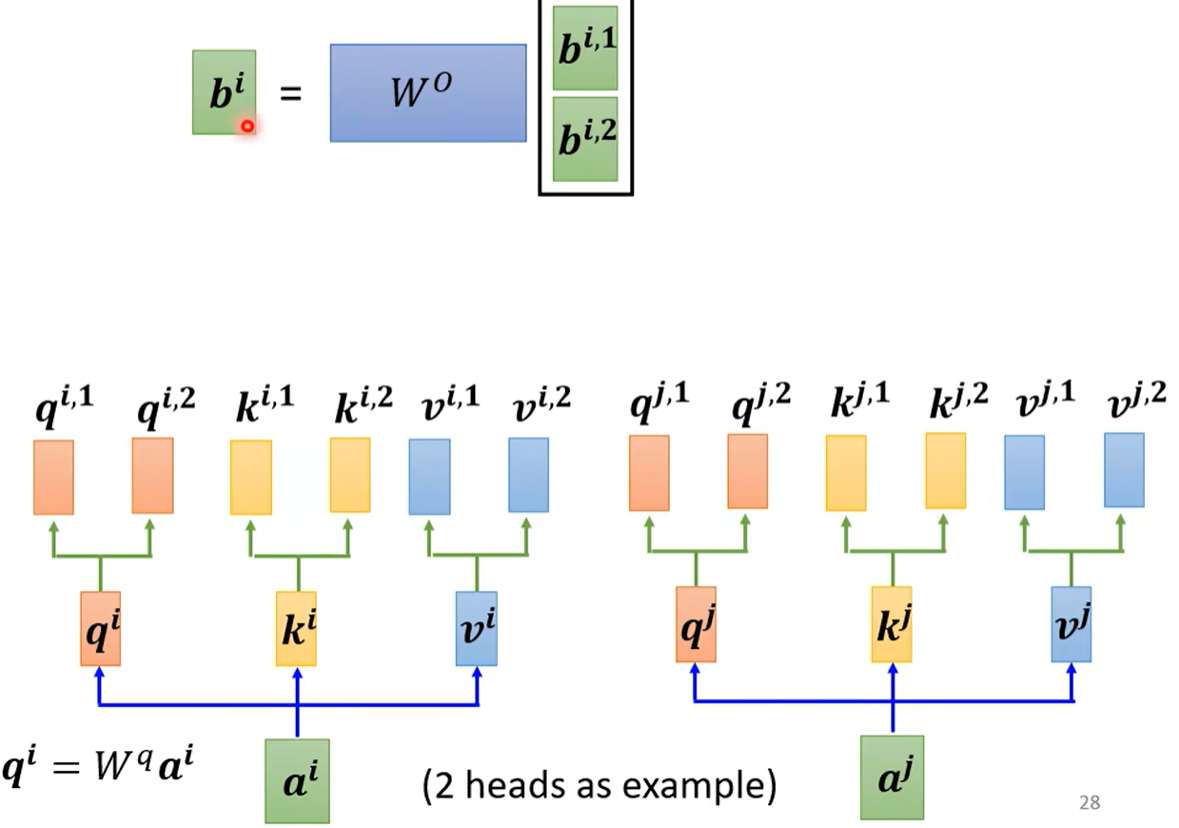

## 4.3 Position Encoding

上面的结构没有保留序列中单位的位置信息

因此我们为每一个位置设定一个 positional vector $e^i$

设定规则：
- hand-crafted
- learned from data

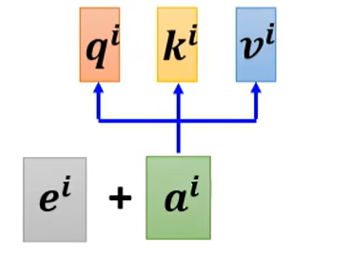

## 4.4 Self Attention VS CNN
Truncated Self-attention：只看一部分序列（自行设定）不用看完整个序列，类似于CNN？

CNN:self-attention that can only attends in a receptive field
- CNN is simplified self-attention. good for less data

Self-attention:CNN with learnable receptive field
- Self-attention is the complex version of CNN. good for more data

## 4.5 Self Attention VS RNN



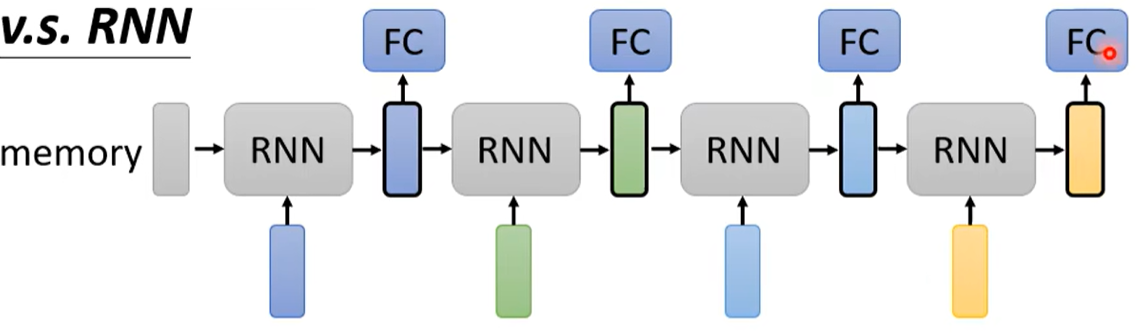

RNN只考虑了已经输入的vector，Self Attention考虑了所有的vector（不过RNN也可以双向）

RNN中最左边的内容需要一路记忆下去，并且无法并行



## 4.6 Batch Normalization

changing landscape：改变 error surface 以使得模型更好 train

问题：几个输入数据维度的数值范围不同，因此学习率作用在不同的数据上移动的速度也不同

办法：不同的dimension的数值范围接近统一

一种实现方法：（一种Feature Normallization）

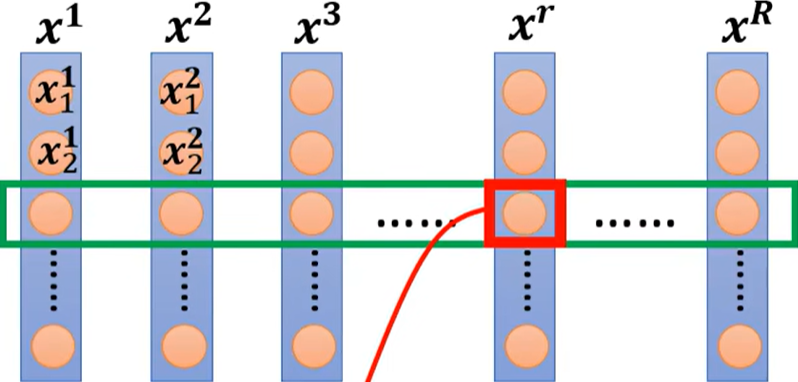

For each dimension $i$： mean:$m_i$，standard deviation：$\sigma_i$

$\widetilde{x^r_i} \gets \frac{x^r_i-m_i}{\sigma_i}$

network因此会变大，一般考虑处理一个batch里的所有数据

因为只考虑一个batch，被称为 Batch Normalization，batch需要足够大

最后让模型能够自行调整数据的分布：$\widetilde{z}^i=\gamma\odot\widetilde{z}^i+\beta$

问题：在testing/inference时，比如在线系统，模型不可能等到一个batch的数据运行一次
- Computing the moving average of $m$ and $\sigma$ of the batches during training.
- moving average：$\overline{\mu}\leftarrow p\overline{\mu}+(1-p)\mu^t$, $p$ 为超参数